참조 : https://dacon.io/codeshare/2344?dtype=recent

In [13]:
# import packages
import pandas as pd
import numpy as np
import os
import random
import pickle
from IPython.display import Image
import seaborn as sns
import shutil
import matplotlib.pylab as plt
import warnings; warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta, datetime
import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## 데이타 불러오기

In [2]:
! pwd

/home/aiffel-dj35/aiffel/Dacon


In [3]:
data_path = os.getenv("HOME") + '/aiffel/Dacon/data/'

In [4]:
# train data
train_x_df = pd.read_csv(data_path+'train_x_df.csv')
train_y_df = pd.read_csv(data_path+'train_y_df.csv')
test_x_df = pd.read_csv(data_path+'test_x_df.csv')

In [23]:
train_x_df

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,0,1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,0,2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,0,3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,0,4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10159555,7361,1375,8,1.000668,1.001669,1.000626,1.001502,9.180907e+00,2203.059082,2.245034,6.229020e+00,1494.727417
10159556,7361,1376,8,1.001627,1.001920,1.000960,1.001294,7.963097e+00,1911.151611,2.211651,3.056139e+00,733.490601
10159557,7361,1377,8,1.001294,1.001461,1.000584,1.000668,3.849893e+00,923.610718,1.260224,2.284546e+00,548.042297
10159558,7361,1378,8,1.000709,1.000751,1.000042,1.000042,1.337402e+00,320.624756,0.826239,5.164965e-01,123.819839


In [24]:
train_y_df

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.000392,1.000588,1.000392,1.000588,8.305119e+05,42356.179688,137.308746,8.305119e+05,42356.179688
1,0,1,7,1.000588,1.001177,1.000392,1.001177,5.320066e+05,27140.638672,294.233032,4.882738e+05,24909.861328
2,0,2,7,1.001177,1.001177,1.001177,1.001177,5.113770e+05,26100.681641,58.846603,5.113770e+05,26100.681641
3,0,3,7,1.001177,1.001373,1.001177,1.001373,1.134853e+06,57929.410156,137.308746,1.095514e+06,55921.156250
4,0,4,7,1.000981,1.000981,0.999804,1.000196,5.801173e+06,295872.343750,666.928162,9.911239e+05,50528.589844
...,...,...,...,...,...,...,...,...,...,...,...,...
883435,7361,115,8,1.007303,1.007845,1.007261,1.007720,2.843995e+00,686.734558,0.792856,1.373841e+00,331.730499
883436,7361,116,8,1.007678,1.008847,1.007678,1.008471,2.577599e+00,622.798462,0.884660,1.638966e+00,396.005463
883437,7361,117,8,1.008513,1.009014,1.008304,1.008805,4.579865e+00,1106.928345,1.210149,1.735705e+00,419.485596
883438,7361,118,8,1.008680,1.009222,1.008680,1.009222,1.065129e+00,257.542755,0.525789,4.348240e-01,105.134232


## 데이타 전처리

### numpy arrary로 변환하기

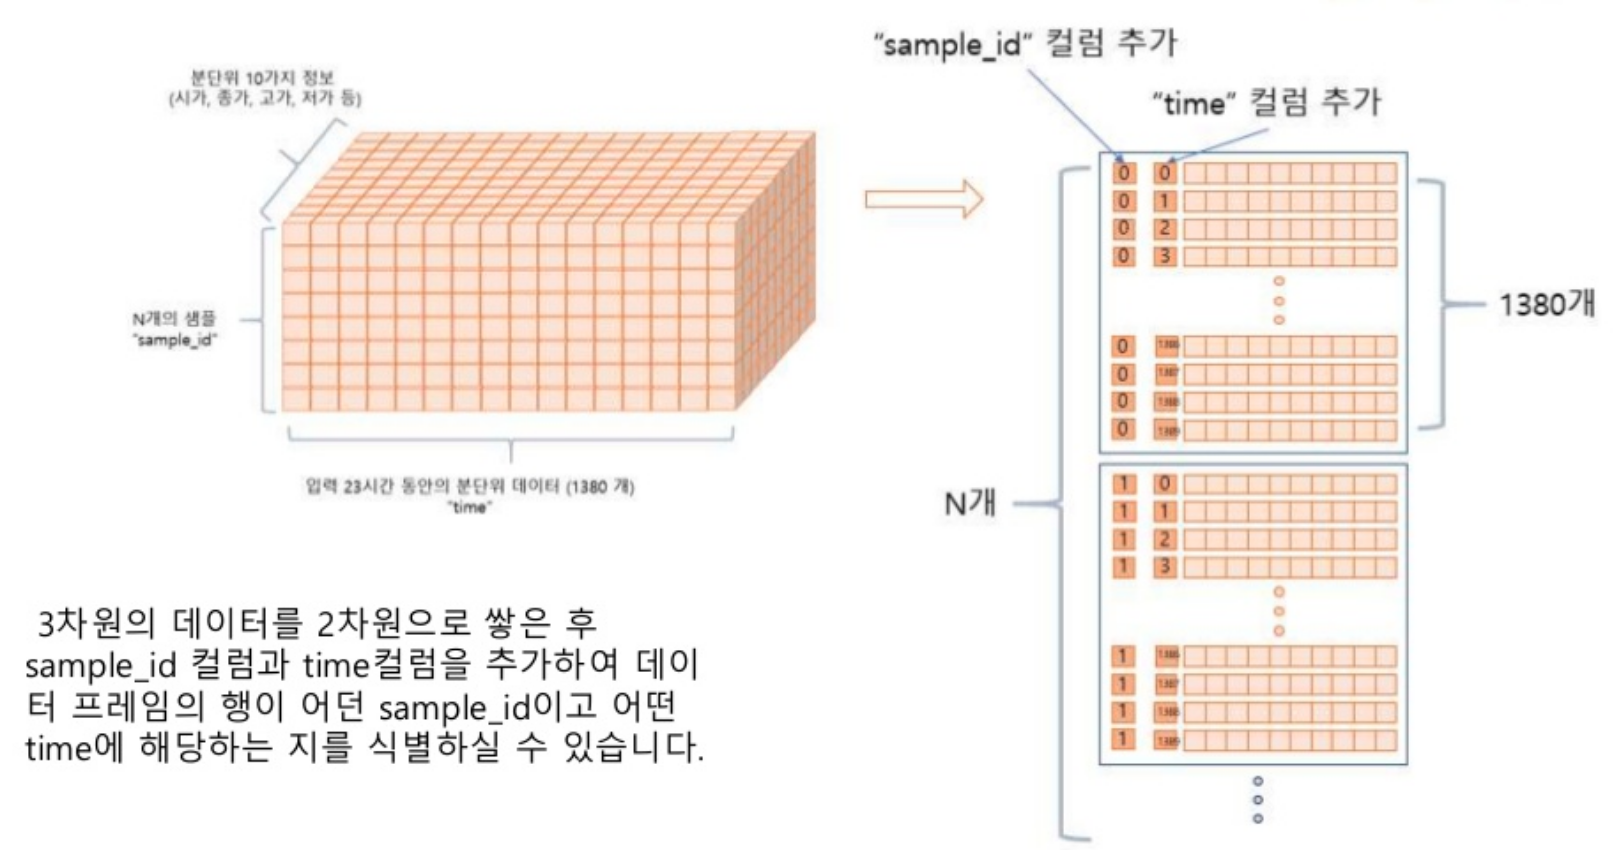

In [5]:
def df2d_to_array3d(df_2d):
    # 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

In [6]:
train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
test_x_array = df2d_to_array3d(test_x_df)

In [7]:
print(f'''
train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}
test_x_array {test_x_array.shape}
''')


train_x_array (7362, 1380, 10)
train_y_array (7362, 120, 10)
test_x_array (529, 1380, 10)



In [8]:
7362*0.2

1472.4

In [11]:
tr = train_x_df.copy()
tr

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,0,1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,0,2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,0,3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,0,4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10159555,7361,1375,8,1.000668,1.001669,1.000626,1.001502,9.180907e+00,2203.059082,2.245034,6.229020e+00,1494.727417
10159556,7361,1376,8,1.001627,1.001920,1.000960,1.001294,7.963097e+00,1911.151611,2.211651,3.056139e+00,733.490601
10159557,7361,1377,8,1.001294,1.001461,1.000584,1.000668,3.849893e+00,923.610718,1.260224,2.284546e+00,548.042297
10159558,7361,1378,8,1.000709,1.000751,1.000042,1.000042,1.337402e+00,320.624756,0.826239,5.164965e-01,123.819839


In [14]:
start_time = '2021-01-31 00:00:00'
start_dt = datetime.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')

idx = 1000
# # train data 중 sample_id 1121에 해당하는 x_series로 arima 모델을 학습한 후
# y_sereis를 추론
x_series = train_x_array[idx,:,1]
y_series = train_y_array[idx,:,1]

In [42]:
x_series_split = train_x_array[idx,1260:,1]
print(len(x_series_split))
x_series_split

120


array([1.00612879, 1.01134455, 1.01504993, 1.01169562, 1.01434743,
       1.01318836, 1.01473379, 1.01520801, 1.01661277, 1.01675332,
       1.01313567, 1.01202941, 1.01104593, 1.01152003, 1.01153767,
       1.01153767, 1.01218748, 1.01427722, 1.01612115, 1.01977372,
       1.01708698, 1.01942253, 1.01852703, 1.01785958, 1.0141542 ,
       1.01504993, 1.01459336, 1.01387322, 1.0135572 , 1.01831615,
       1.01420701, 1.01626158, 1.01591027, 1.01713967, 1.01580501,
       1.01538348, 1.01324105, 1.01239812, 1.01051903, 1.00816596,
       1.00604105, 1.00576007, 1.00500488, 1.00697172, 1.0069015 ,
       1.00625181, 1.00667322, 1.00493467, 1.00512779, 1.00760388,
       1.00714731, 1.00793767, 1.00623417, 1.00572491, 1.00568974,
       1.00535607, 1.00537372, 1.00618148, 1.00583029, 1.00544393,
       1.0059005 , 1.00193179, 1.00193179, 1.00554931, 1.00463617,
       1.00479424, 1.00291514, 1.0036    , 1.00193179, 1.00258148,
       1.00479424, 1.00625181, 1.006603  , 1.00537372, 1.00535

In [17]:
x_df = pd.DataFrame()
x_df['ds'] = [start_dt + datetime.timedelta(minutes = time_min) for time_min in np.arange(1, x_series.shape[0]+1).tolist()]
x_df['y'] = x_series.tolist()

x_df

,ds,y
0,2021-01-31 00:01:00,1.040601
1,2021-01-31 00:02:00,1.042147
2,2021-01-31 00:03:00,1.041339
3,2021-01-31 00:04:00,1.039987
4,2021-01-31 00:05:00,1.041146
...,...,...
1375,2021-01-31 22:56:00,0.998753
1376,2021-01-31 22:57:00,0.999157
1377,2021-01-31 22:58:00,0.999982
1378,2021-01-31 22:59:00,0.999789


In [35]:
tmp = train_x_df[train_x_df['sample_id']==idx]
tmp['open']

1380000    1.040601
1380001    1.042147
1380002    1.041339
1380003    1.039987
1380004    1.041146
             ...   
1381375    0.998753
1381376    0.999157
1381377    0.999982
1381378    0.999789
1381379    1.000000
Name: open, Length: 1380, dtype: float64

In [36]:
tmp_y = train_y_df[train_y_df['sample_id']==idx]
tmp_y['open']

120000    1.000703
120001    0.998455
120002    0.999210
120003    0.998560
120004    0.997875
            ...   
120115    1.001405
120116    1.000983
120117    1.000053
120118    1.001036
120119    1.001247
Name: open, Length: 120, dtype: float64

In [3]:
# #train, valid 데이타를 위한 가공 - 일단위 합계
# tr = train_original.copy()
# tr['DateTime_New'] = pd.to_datetime(tr.DateTime)
# tr['date_New'] = tr.DateTime_New.dt.date
# tr = tr.groupby('date_New').sum().reset_index()
# tr = tr.set_index('date_New') 
# tr

,사용자,세션,신규방문자,페이지뷰
date_New,,,,
2018-09-09,281,266,73,1826
2018-09-10,264,247,51,2092
2018-09-11,329,310,58,1998
2018-09-12,300,287,45,2595
2018-09-13,378,344,50,3845
...,...,...,...,...
2020-11-04,4516,4472,1196,112683
2020-11-05,4155,4037,1044,102901
2020-11-06,3663,3576,825,88015


In [4]:
# #상관분석 - 각 변수간의 연관성이 매우 높음
# corr=tr.corr(method="pearson")
# corr

,사용자,세션,신규방문자,페이지뷰
사용자,1.000000,0.998806,0.934809,0.951243
세션,0.998806,1.000000,0.942562,0.942201
신규방문자,0.934809,0.942562,1.000000,0.864978
페이지뷰,0.951243,0.942201,0.864978,1.000000


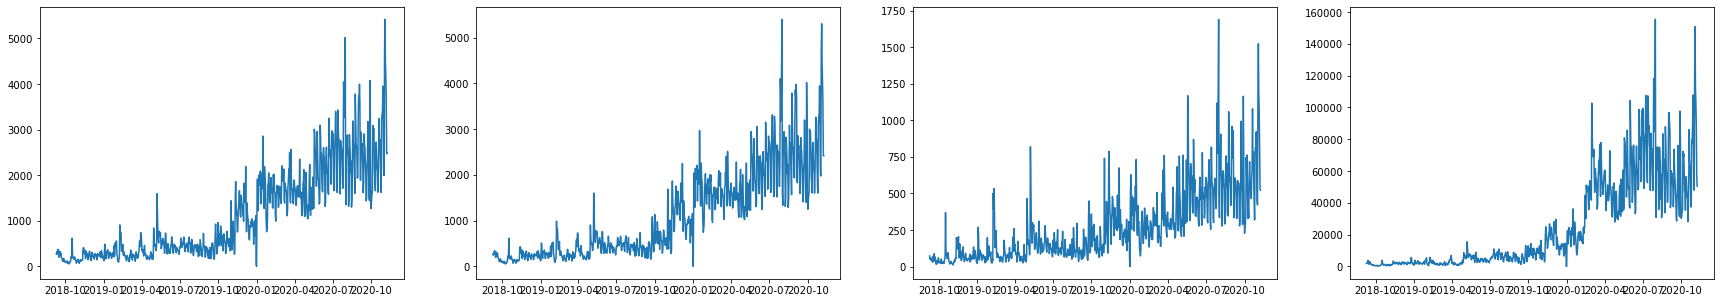

In [5]:
# # 항목별 plot
# plt.figure(figsize=(30, 5))
# plt.subplot(141)
# plt.plot(tr["사용자"], label="사용자")

# plt.subplot(142)
# plt.plot(tr["세션"], label="세션")

# plt.subplot(143)
# plt.plot(tr["신규방문자"], label="신규방문자")

# plt.subplot(144)
# plt.plot(tr["페이지뷰"], label="페이지뷰")

# plt.show()

### validation set 분리

각 컬럼별 예측을 위한 데이타 분리 - 사용자

In [18]:
# train 데이터 상단의 300개 샘플로 validation set를 구성하여 학습 및 추론
valid_x_df = train_x_df[train_x_df.sample_id < 300]
valid_y_df = train_y_df[train_y_df.sample_id < 300]

valid_x_array = df2d_to_array3d(valid_x_df)
valid_y_array = df2d_to_array3d(valid_y_df)
valid_pred_array = np.zeros([300, 120])

In [48]:
valid_x_split = train_x_array[1,1260:,1]
print(len(valid_x_split))
valid_x_split

120


array([1.00720799, 1.00720799, 1.00714517, 1.00755429, 1.00742841,
       1.00705063, 1.00607491, 1.00607491, 1.00553989, 1.00468993,
       1.00415492, 1.00513065, 1.00412333, 1.00409186, 1.00305319,
       1.00295877, 1.00248659, 1.00330496, 1.00317907, 1.00264394,
       1.00311613, 1.00440669, 1.0033679 , 1.00424933, 1.0037142 ,
       1.00280142, 1.00273836, 1.00276995, 1.00390303, 1.00446963,
       1.00506771, 1.00557125, 1.0045011 , 1.00598049, 1.00588608,
       1.00616932, 1.00616932, 1.0049417 , 1.0049417 , 1.00591755,
       1.00667298, 1.00648403, 1.00613785, 1.01000941, 1.00881326,
       1.00793195, 1.00793195, 1.00821531, 1.00843561, 1.00884485,
       1.00796354, 1.00670433, 1.00768018, 1.00793195, 1.00749135,
       1.00742841, 1.00755429, 1.00594902, 1.00557125, 1.00462699,
       1.00339937, 1.00327349, 1.0045011 , 1.00481582, 1.002581  ,
       0.98819637, 0.9653132 , 0.969531  , 0.97966635, 0.97780919,
       0.97576326, 0.9876613 , 0.99021089, 0.98964429, 0.99153

## RandomForest

moving window 인가?

In [21]:
# WINDOW_SIZE = 8
# #사용자만 남기기
# tr1 = pd.DataFrame(tr["사용자"])

# # 2020-08-30을 기준으로 train과 valid로 분리
# split_date = pd.Timestamp('08-30-2020')
# train = tr1.loc[:split_date, ]
# valid = tr1.loc[split_date:, ]

# # 데이타 Scaling
# # MinMaxScaler() 사용할 필요 없다
# sc = MinMaxScaler()
# train_sc = sc.fit_transform(train)
# valid_sc = sc.transform(valid)

# # DataFrame으로 변환
# # df 있음
# train_sc_df = pd.DataFrame(train_sc, columns=["사용자"], index=train.index)
# valid_sc_df = pd.DataFrame(valid_sc, columns=["사용자"], index=valid.index)

# # 과거 15개를 이용하여 현재값을 예측하는 Window 생성
# # 모르겠다.
# train_shift = train_sc_df.copy() # 위에서 처리한 원본을 복사
# valid_shift = valid_sc_df.copy() # 위에서 처리한 원본을 복사

# # window 생성
# # 모르겠다.
# for s in range(1, WINDOW_SIZE + 1):
#     train_shift["shift_사용자_{}".format(s)] = train_shift["사용자"].shift(s)
#     valid_shift["shift_사용자_{}".format(s)] = valid_shift["사용자"].shift(s)
    
# # 최종 train, valid 데이타셋 만들기
# # 따로 300개를 val로 만들었다.
# X_train = train_shift.dropna().drop("사용자", axis=1)
# y_train = train_shift.dropna()[["사용자"]]

# X_valid = valid_shift.dropna().drop("사용자", axis=1)
# y_valid = valid_shift.dropna()[["사용자"]]

# X_train_val = X_train.values
# y_train_val = y_train.values

# X_valid_val = X_valid.values
# y_valid_val = y_valid.values

### MinMaxScaler() 사용할 필요 없다

In [22]:
# #  MinMaxScaler() 사용해보기  
# sc = MinMaxScaler()
# train_sc = sc.fit_transform(train_x_df)
# valid_sc = sc.transform(valid_x_df)

In [23]:
# len(train_sc)

10159560

7362상황에서 1380(=60\*23)분 동안의 각 칼람에 대한 데이터

In [25]:
# type(train_sc)

numpy.ndarray

In [31]:
# train_sc

array([[0.00000000e+00, 0.00000000e+00, 7.77777778e-01, ...,
        7.20944802e-03, 9.98136504e-05, 1.62606966e-03],
       [0.00000000e+00, 7.25163162e-04, 7.77777778e-01, ...,
        6.26908571e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.45032632e-03, 7.77777778e-01, ...,
        9.40362795e-04, 2.26818841e-06, 3.69555800e-05],
       ...,
       [1.00000000e+00, 9.98549674e-01, 8.88888889e-01, ...,
        2.01382466e-05, 3.11224326e-10, 2.36222827e-05],
       [1.00000000e+00, 9.99274837e-01, 8.88888889e-01, ...,
        1.32032216e-05, 7.03624604e-11, 5.33701006e-06],
       [1.00000000e+00, 1.00000000e+00, 8.88888889e-01, ...,
        1.02691729e-05, 9.97328954e-11, 7.56577455e-06]])

In [32]:
# len(train_sc[0])

12

In [33]:
# len(train_sc)

10159560

In [29]:
# train_x_df.index

RangeIndex(start=0, stop=10159560, step=1)

### Random Forest학습

In [27]:
x_df

,ds,y
0,2021-01-31 00:01:00,1.040601
1,2021-01-31 00:02:00,1.042147
2,2021-01-31 00:03:00,1.041339
3,2021-01-31 00:04:00,1.039987
4,2021-01-31 00:05:00,1.041146
...,...,...
1375,2021-01-31 22:56:00,0.998753
1376,2021-01-31 22:57:00,0.999157
1377,2021-01-31 22:58:00,0.999982
1378,2021-01-31 22:59:00,0.999789


In [29]:
y_series.shape

(120,)

In [37]:
rf_model= RandomForestRegressor(bootstrap=True, n_estimators=30, n_jobs=1, random_state=2021, verbose=0) 
rf_model.fit(tmp, tmp_y)

ValueError: Found input variables with inconsistent numbers of samples: [1380, 120]

In [33]:
rf_model= RandomForestRegressor(bootstrap=True, n_estimators=30, n_jobs=1, random_state=2021, verbose=0) 
rf_model.fit(x_series, y_series)

# #예측
# rf_pred = rf_model.predict(valid_x_df)

# # RMSE 값 확인
# print(mean_squared_error(valid_y_df, rf_pred))

# #제출 파일 만들기
# rf_result=np.expm1(rf_model.predict(valid_x_df))
# test_original["세션"] = sc.inverse_transform((rf_result[:-2]).reshape(-1, 1)) 

ValueError: Expected 2D array, got 1D array instead:
array=[1.0406013 1.0421467 1.0413389 ... 0.9999824 0.9997893 1.       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
# train_sc_df = pd.DataFrame(train_sc, columns=["close", ])

ValueError: Shape of passed values is (10159560, 12), indices imply (10159560, 1)

In [28]:
# DataFrame으로 변환
# train_sc_df = pd.DataFrame(train_sc, columns=["close"], index=train_x_df.index)
# valid_sc_df = pd.DataFrame(valid_sc, columns=["close"], index=valid_x_df.index)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

### close 가격으로 df 만들어야 하지 않나?

In [35]:
idx = 0

In [36]:
x_series = train_x_array[idx,:,4]
y_series = train_y_array[idx,:,4]

In [6]:
WINDOW_SIZE = 8
#사용자만 남기기
tr1 = pd.DataFrame(tr["사용자"])

# 2020-08-30을 기준으로 train과 valid로 분리
split_date = pd.Timestamp('08-30-2020')
train = tr1.loc[:split_date, ]
valid = tr1.loc[split_date:, ]

# 데이타 Scaling
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
valid_sc = sc.transform(valid)

# DataFrame으로 변환
train_sc_df = pd.DataFrame(train_sc, columns=["사용자"], index=train.index)
valid_sc_df = pd.DataFrame(valid_sc, columns=["사용자"], index=valid.index)

# 과거 15개를 이용하여 현재값을 예측하는 Window 생성
train_shift = train_sc_df.copy() # 위에서 처리한 원본을 복사
valid_shift = valid_sc_df.copy() # 위에서 처리한 원본을 복사

# window 생성
for s in range(1, WINDOW_SIZE + 1):
    train_shift["shift_사용자_{}".format(s)] = train_shift["사용자"].shift(s)
    valid_shift["shift_사용자_{}".format(s)] = valid_shift["사용자"].shift(s)
    
# 최종 train, valid 데이타셋 만들기
X_train = train_shift.dropna().drop("사용자", axis=1)
y_train = train_shift.dropna()[["사용자"]]

X_valid = valid_shift.dropna().drop("사용자", axis=1)
y_valid = valid_shift.dropna()[["사용자"]]

X_train_val = X_train.values
y_train_val = y_train.values

X_valid_val = X_valid.values
y_valid_val = y_valid.values

In [7]:
#Random Forest학습
rf_model= RandomForestRegressor(bootstrap=True, n_estimators=30, n_jobs=1, random_state=1104, verbose=0) #SEED값에 따라 같은 모델나오게함
rf_model.fit(X_train, y_train)

#예측
rf_pred = rf_model.predict(X_valid)

# RMSE 값 확인
print(mean_squared_error(y_valid, rf_pred))

#제출 파일 만들기
rf_result=np.expm1(rf_model.predict(X_valid))
test_original["사용자"] = sc.inverse_transform((rf_result[:-2]).reshape(-1, 1)) 

0.013212805440132737


각 컬럼별 예측을 위한 데이타 분리 - 세션

In [8]:
WINDOW_SIZE = 8

#세션만 남기기
tr1 = pd.DataFrame(tr["세션"])

# 2020-08-30을 기준으로 train과 valid로 분리
split_date = pd.Timestamp('08-30-2020')
train = tr1.loc[:split_date, ]
valid = tr1.loc[split_date:, ]

# 데이타 Scaling
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
valid_sc = sc.transform(valid)

# DataFrame으로 변환
train_sc_df = pd.DataFrame(train_sc, columns=["세션"], index=train.index)
valid_sc_df = pd.DataFrame(valid_sc, columns=["세션"], index=valid.index)

# 과거 15개를 이용하여 현재값을 예측하는 Window 생성
train_shift = train_sc_df.copy() # 위에서 처리한 원본을 복사
valid_shift = valid_sc_df.copy() # 위에서 처리한 원본을 복사

# window 생성
for s in range(1, WINDOW_SIZE + 1):
    train_shift["shift_세션_{}".format(s)] = train_shift["세션"].shift(s)
    valid_shift["shift_세션_{}".format(s)] = valid_shift["세션"].shift(s)
    
    
# 최종 train, valid 데이타셋 만들기
X_train = train_shift.dropna().drop("세션", axis=1)
y_train = train_shift.dropna()[["세션"]]

X_valid = valid_shift.dropna().drop("세션", axis=1)
y_valid = valid_shift.dropna()[["세션"]]

X_train_val = X_train.values
y_train_val = y_train.values

X_valid_val = X_valid.values
y_valid_val = y_valid.values

### series 넣었더니 reshape 하라고 해서 함

In [39]:
# reshape시키기
x_reshape = x_series.reshape(-1,1)
y_reshape = y_series.reshape(-1,1)

In [50]:
x_reshape = x_series_split.reshape(-1,1)
y_reshape = y_series.reshape(-1,1)
val_reshape = valid_x_split.reshape(-1,1)

In [51]:
#Random Forest학습
rf_model= RandomForestRegressor(n_estimators=30, random_state=1104, verbose=0) #SEED값에 따라 같은 모델나오게함
rf_model.fit(x_reshape, y_reshape)

RandomForestRegressor(n_estimators=30, random_state=1104)

In [54]:
rf_pred = rf_model.predict(val_reshape)

# RMSE 값 확인
print(mean_squared_error(val_reshape, rf_pred))

#제출 파일 만들기
rf_result=np.expm1(rf_model.predict(x_reshape))
# test_original["세션"] = sc.inverse_transform((rf_result[:-2]).reshape(-1, 1)) 

8.577826994091503e-05


In [55]:
rf_pred

array([1.00812316, 1.00812316, 1.00812316, 1.00812018, 1.00807803,
       1.00790836, 1.00585929, 1.00585929, 1.00515423, 1.0023613 ,
       1.00326864, 1.00847266, 1.00326864, 1.0032101 , 1.00181932,
       1.00191412, 1.0019267 , 1.00252062, 1.0027255 , 1.00046915,
       1.0027255 , 1.00329557, 1.00162261, 1.00329557, 1.00162261,
       1.00149441, 1.00019784, 1.0015828 , 1.00181926, 1.00329557,
       1.00847266, 1.00540184, 1.00329557, 1.00614466, 1.00521624,
       1.00414125, 1.00414125, 1.0070232 , 1.0070232 , 1.00521624,
       1.00619794, 1.00335566, 1.00302233, 1.0064742 , 1.00814658,
       1.00842054, 1.00842054, 1.00815185, 1.00815185, 1.00814658,
       1.00842054, 1.00618974, 1.00812018, 1.00842054, 1.00810262,
       1.00807803, 1.00812018, 1.00547849, 1.00540184, 1.00273944,
       1.00162261, 1.00252062, 1.00329557, 1.001032  , 1.00046915,
       1.0065801 , 1.0065801 , 1.0065801 , 1.0065801 , 1.0065801 ,
       1.0065801 , 1.0065801 , 1.0065801 , 1.0065801 , 1.00652

In [14]:
#Date Type 변경
test_original=test_original.astype({'사용자':'int'})
test_original=test_original.astype({'세션':'int'})
test_original=test_original.astype({'신규방문자':'int'})
test_original=test_original.astype({'페이지뷰':'int'})

In [15]:
fname = f"C:/Users/hani9/Desktop/DACON/RF_1104_30.csv"
test_original.to_csv(fname, index=False, encoding='ansi')
print(f"'{fname}' is ready to submit.")

'C:/Users/hani9/Desktop/DACON/RF_1104_30.csv' is ready to submit.


## fbprophet

In [16]:
from fbprophet import Prophet

tr_fb = train_original.copy()
tr_fb['DateTime_New'] = pd.to_datetime(tr_fb.DateTime)
tr_fb['ds'] = tr_fb.DateTime_New.dt.date
tr_fb = tr_fb.groupby('ds').sum().reset_index()
tr_fb = tr_fb.set_index('ds')  

Importing plotly failed. Interactive plots will not work.


각 컬럼별 예측을 위한 데이타 분리 - 사용자

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


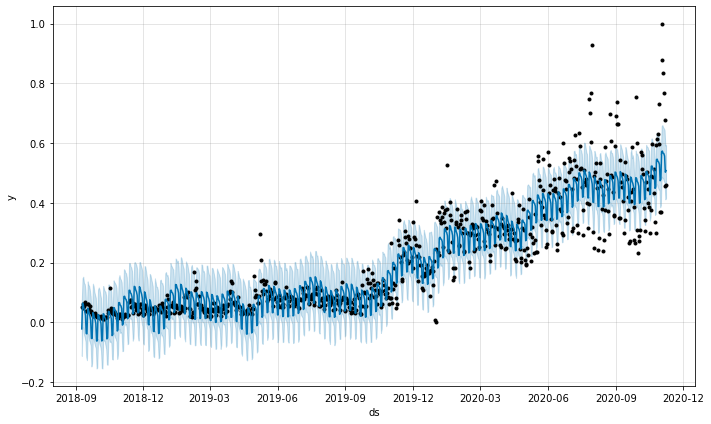

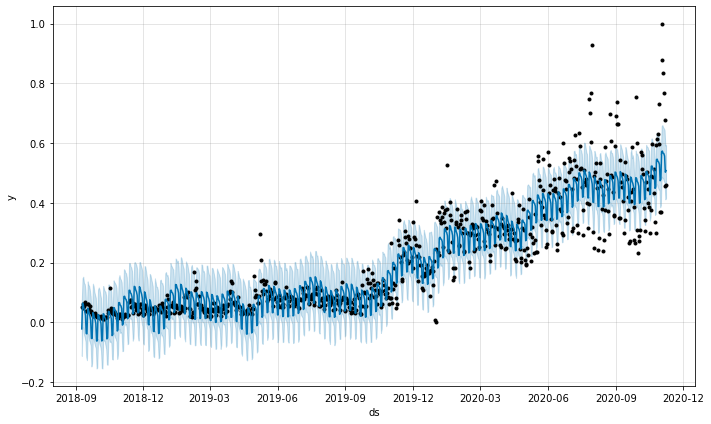

In [17]:
tr1 = pd.DataFrame(tr_fb["사용자"])
tr1_sc = sc.fit_transform(tr1) # 데이타 Scaling

# DataFrame으로 변환
tr1_sc_df = pd.DataFrame(tr1_sc, columns=["사용자"], index=tr1.index)

#Prophet에 맞게 데이터 변환하기
tr1_sc_df.rename(columns={'사용자':'y'},inplace=True) #컬럼명 변경

#데이터 타입 변경
tr1_sc_df=tr1_sc_df.reset_index('ds')
tr1_sc_df['ds']=pd.to_datetime(tr1_sc_df['ds'])

# 모델 생성
model = Prophet()
model.fit(tr1_sc_df)

train_pred = model.predict(tr1_sc_df)
model.plot(train_pred)

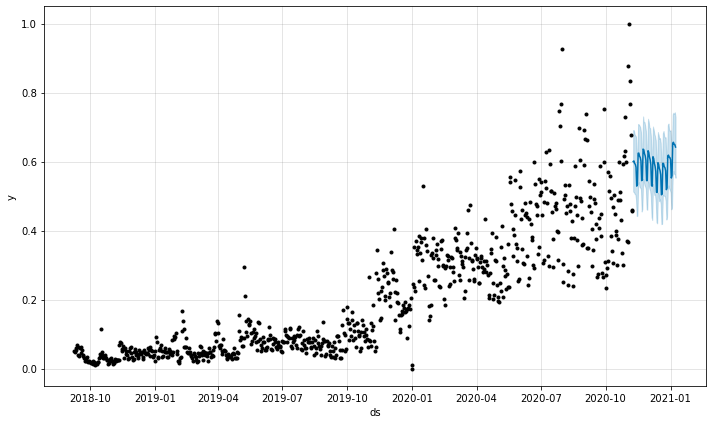

In [18]:
# 예측
test = test_original.copy()

#컬럼명 변경
test.rename(columns={'사용자':'y'},inplace=True)
test.rename(columns={'DateTime':'ds'},inplace=True)

test_ds=pd.DataFrame(test['ds']) #ds만 남기기

test_pred = model.predict(test_ds)
model.plot(test_pred)
test_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

#제출파일 만들기
pred_all=[]

yhat=pd.DataFrame(test_pred['yhat'])
yhat = yhat.values

pred_all = np.append(pred_all, sc.inverse_transform(yhat.reshape(-1, 1)).astype(int))
test_original["사용자"] = pred_all

각 컬럼별 예측을 위한 데이타 분리 - 세션

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


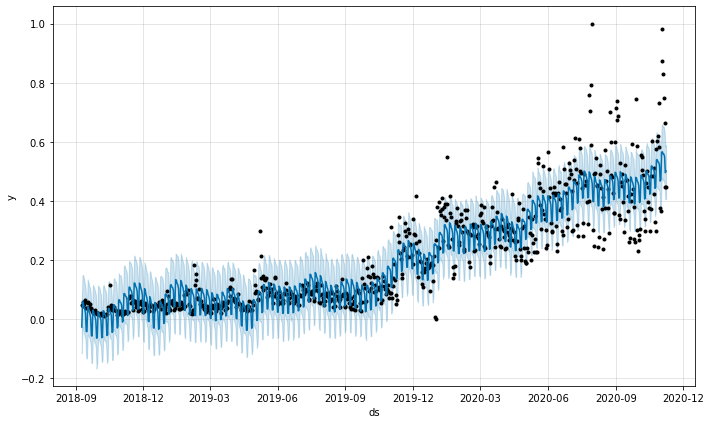

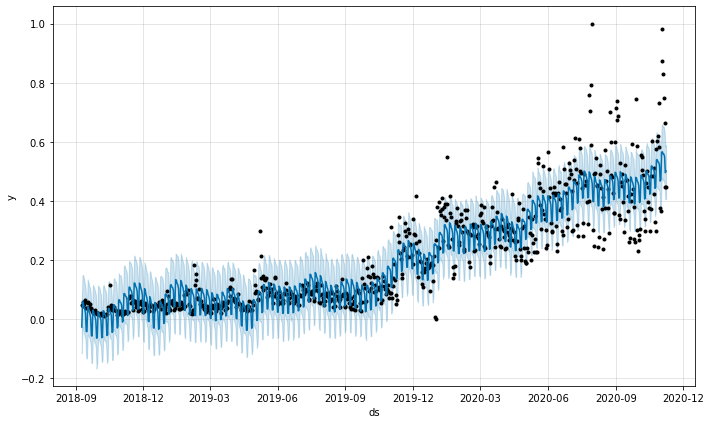

In [19]:
tr1 = pd.DataFrame(tr_fb["세션"])
tr1_sc = sc.fit_transform(tr1) # 데이타 Scaling

# DataFrame으로 변환
tr1_sc_df = pd.DataFrame(tr1_sc, columns=["세션"], index=tr1.index)

#Prophet에 맞게 데이터 변환하기
tr1_sc_df.rename(columns={'세션':'y'},inplace=True) #컬럼명 변경

#데이터 타입 변경
tr1_sc_df=tr1_sc_df.reset_index('ds')
tr1_sc_df['ds']=pd.to_datetime(tr1_sc_df['ds'])

# 모델 생성
model = Prophet()
model.fit(tr1_sc_df)

train_pred = model.predict(tr1_sc_df)
model.plot(train_pred)

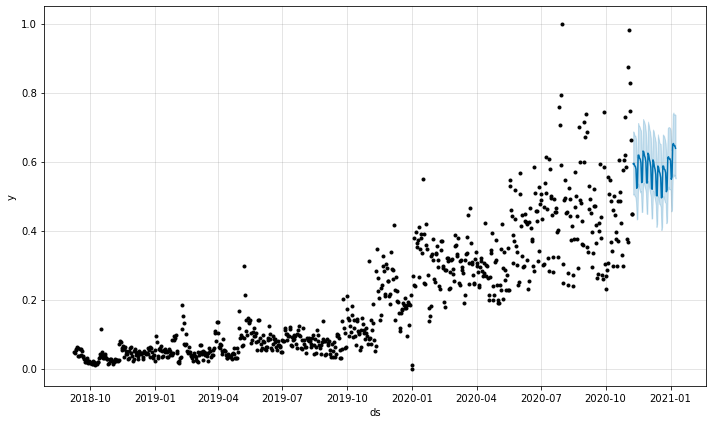

In [20]:
# 예측
test = test_original.copy()

#컬럼명 변경
test.rename(columns={'세션':'y'},inplace=True)
test.rename(columns={'DateTime':'ds'},inplace=True)

test_ds=pd.DataFrame(test['ds']) #ds만 남기기

test_pred = model.predict(test_ds)
model.plot(test_pred)
test_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

#제출파일 만들기
pred_all=[]

yhat=pd.DataFrame(test_pred['yhat'])
yhat = yhat.values

pred_all = np.append(pred_all, sc.inverse_transform(yhat.reshape(-1, 1)).astype(int))
test_original["세션"] = pred_all

각 컬럼별 예측을 위한 데이타 분리 - 신규방문자

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


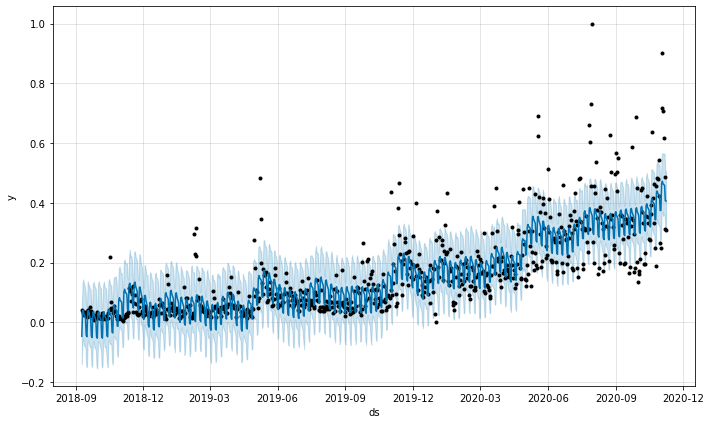

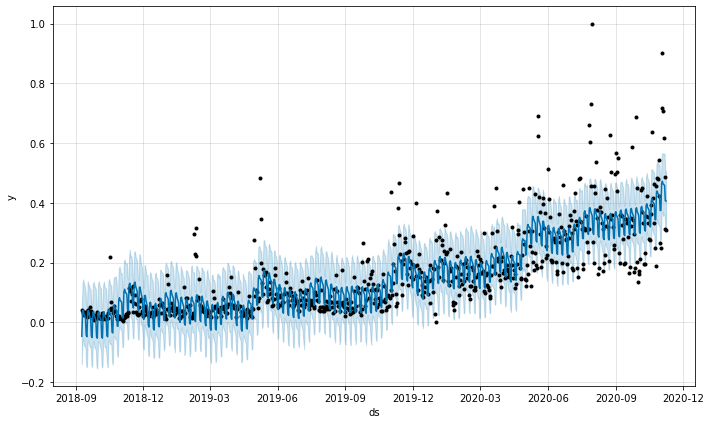

In [21]:
#####신규방문자
tr1 = pd.DataFrame(tr_fb["신규방문자"])
tr1_sc = sc.fit_transform(tr1) # 데이타 Scaling

# DataFrame으로 변환
tr1_sc_df = pd.DataFrame(tr1_sc, columns=["신규방문자"], index=tr1.index)

#Prophet에 맞게 데이터 변환하기
tr1_sc_df.rename(columns={'신규방문자':'y'},inplace=True) #컬럼명 변경

#데이터 타입 변경
tr1_sc_df=tr1_sc_df.reset_index('ds')
tr1_sc_df['ds']=pd.to_datetime(tr1_sc_df['ds'])

# 모델 생성
model = Prophet()
model.fit(tr1_sc_df)

train_pred = model.predict(tr1_sc_df)
model.plot(train_pred)

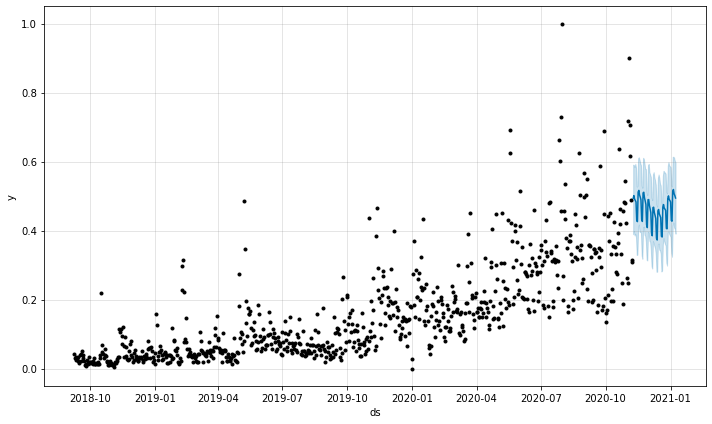

In [22]:
# 예측
test = test_original.copy()

#컬럼명 변경
test.rename(columns={'신규방문자':'y'},inplace=True)
test.rename(columns={'DateTime':'ds'},inplace=True)

test_ds=pd.DataFrame(test['ds']) #ds만 남기기

test_pred = model.predict(test_ds)
model.plot(test_pred)

test_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

#제출파일 만들기
pred_all=[]

yhat=pd.DataFrame(test_pred['yhat'])
yhat = yhat.values

pred_all = np.append(pred_all, sc.inverse_transform(yhat.reshape(-1, 1)).astype(int))
test_original["신규방문자"] = pred_all

각 컬럼별 예측을 위한 데이타 분리 - 페이지뷰

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


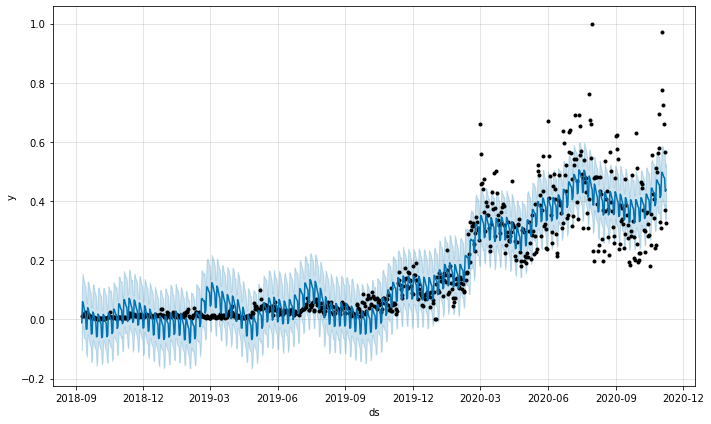

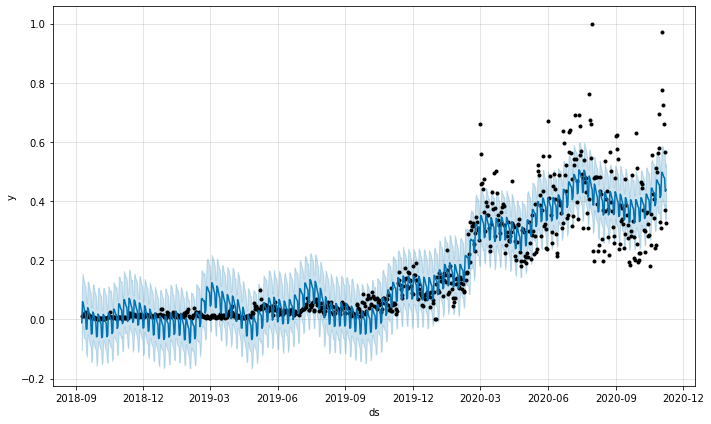

In [23]:
tr1 = pd.DataFrame(tr_fb["페이지뷰"])
tr1_sc = sc.fit_transform(tr1) # 데이타 Scaling

# DataFrame으로 변환
tr1_sc_df = pd.DataFrame(tr1_sc, columns=["페이지뷰"], index=tr1.index)

#Prophet에 맞게 데이터 변환하기
tr1_sc_df.rename(columns={'페이지뷰':'y'},inplace=True) #컬럼명 변경

#데이터 타입 변경
tr1_sc_df=tr1_sc_df.reset_index('ds')
tr1_sc_df['ds']=pd.to_datetime(tr1_sc_df['ds'])

# 모델 생성
model = Prophet()
model.fit(tr1_sc_df)

train_pred = model.predict(tr1_sc_df)
model.plot(train_pred)

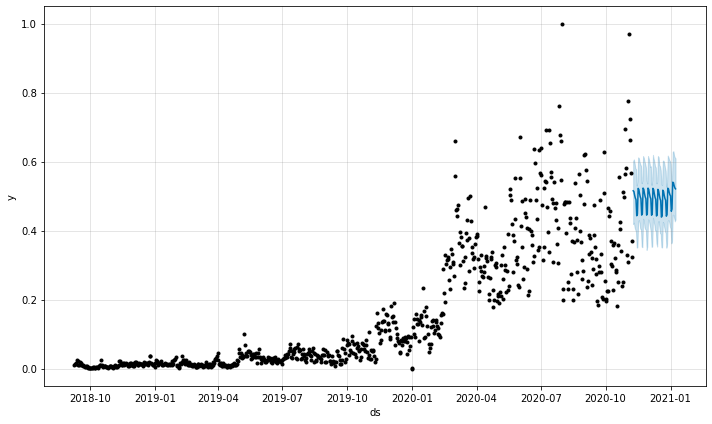

In [24]:
# 예측
test = test_original.copy()

#컬럼명 변경
test.rename(columns={'페이지뷰':'y'},inplace=True)
test.rename(columns={'DateTime':'ds'},inplace=True)

test_ds=pd.DataFrame(test['ds']) #ds만 남기기

test_pred = model.predict(test_ds)
model.plot(test_pred)

test_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

#제출파일 만들기
pred_all=[]

yhat=pd.DataFrame(test_pred['yhat'])
yhat = yhat.values

pred_all = np.append(pred_all, sc.inverse_transform(yhat.reshape(-1, 1)).astype(int))
test_original["페이지뷰"] = pred_all

In [26]:
fname = f"C:/Users/hani9/Desktop/DACON/fbprophet.csv"
test_original.to_csv(fname, index=False, encoding='ansi')
print(f"'{fname}' is ready to submit.")

'C:/Users/hani9/Desktop/DACON/fbprophet.csv' is ready to submit.


## 앙상블

In [27]:
# 파일 불러오기
import numpy as np
import pandas as pd

submission_1 = pd.read_csv("C:/Users/hani9/Desktop/DACON/RF_1104_30.csv", encoding = 'euc-kr')
submission_2 = pd.read_csv("C:/Users/hani9/Desktop/DACON/fbprophet.csv", encoding = 'euc-kr')

# 앙상블 함수
def averaging_ensemble(list_ = [],cols_size = 4,p=1):

    list_size = len(list_)
    if list_size < 2:
        print("")
        return
    
    pred_means = []
    for s_ in range(cols_size):
        
        preds = [ v.iloc[:,s_].tolist() for v in list_]
 
        if p == 0:
            pred_mean = gmean(preds, axis=0)
        else:
            pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(list_))**(1/p)
        
        pred_means.append(pred_mean)
        
    return pred_means

['사용자', '세션', '신규방문자', '페이지뷰']


<AxesSubplot:>

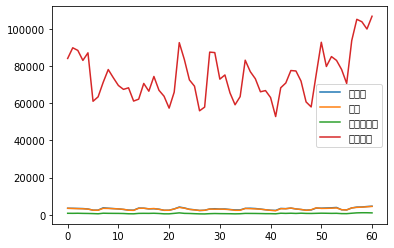

In [28]:
submit_cols = submission_1.columns[1:].tolist()
print(submit_cols)

# 최종결과 dataFrame 
final_submit = pd.DataFrame({'DateTime': submission_1.iloc[:,0]})

submission_list = [
    submission_1.iloc[:,1:], # datetime 컬럼 제외해서 넣기
    submission_2.iloc[:,1:], # datetime 컬럼 제외해서 넣기
]

p=1
pred_means = averaging_ensemble(list_ = submission_list, p=p)
for i, pred in enumerate(pred_means):
    final_submit[submit_cols[i]] = pred

final_submit.iloc[:,1:] = final_submit.iloc[:,1:].round(0).astype('int64')
final_submit.head(20)

final_submit.plot()

# 2차 Train data와 결과 비교해보기(RMSE기준)

In [29]:
train2_original = pd.read_csv("C:/Users/hani9/Desktop/DACON/2차_train.csv", encoding = 'euc-kr')
train2 = train2_original.copy()

train2['DateTime_New'] = pd.to_datetime(train2.DateTime)
train2['DateTime'] = train2.DateTime_New.dt.date
train2 = train2.groupby('DateTime').sum().reset_index()
train2 = train2.set_index('DateTime')  # 최종방문일시의 마지막 날짜를 인덱스로 만든다.
train2 = pd.DataFrame(train2)

#12월 8일까지만 남기기
test_original_re=final_submit.set_index('DateTime')
test_original_re=final_submit.iloc[:30, ]

#컬럼명바꾸기
test_original_re.rename(columns={'사용자':'pr_사용자','세션':'pr_세션','신규방문자':'pr_신규방문자','페이지뷰':'pr_페이지뷰'},inplace=True)
test_original_re=test_original_re.reset_index()
test_original_re=test_original_re[["pr_사용자","pr_세션","pr_신규방문자","pr_페이지뷰"]]

# 결과 비교를 위해 기존에 마련해둔 test데이터에 결과를 붙임
train3=train2.reset_index()
result=pd.concat([train3,test_original_re],axis=1)

# RMSE를 살펴 봄
rmse_1 = np.mean(np.sqrt((result['pr_사용자'] - result['사용자']) ** 2)) 
rmse_2 = np.mean(np.sqrt((result['pr_세션'] - result['세션']) ** 2)) 
rmse_3 = np.mean(np.sqrt((result['pr_신규방문자'] - result['신규방문자']) ** 2)) 
rmse_4 = np.mean(np.sqrt((result['pr_페이지뷰'] - result['페이지뷰']) ** 2)) 
print(rmse_1, rmse_2, rmse_3, rmse_4)

475.4 460.3666666666667 139.06666666666666 15886.033333333333


In [30]:
final_submit.to_csv(f'C:/Users/hani9/Desktop/DACON/RFXfbp.csv', index = False, encoding = 'euc-kr')